# Лабораторная работа №2. EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../data/DataSet2.csv')

# Исследование исходных данных

Датасет содержит следующие поля:

- "Film" - название фильма
- "Oscar Year" - год, в который этот фильм выиграл/был кандидатом Оскара
- "Film Studio/Producer(s)" - студия/продюсеры фильма
- "Award" - результаты конкурса на Оскар: победитель/кандидат (если не выиграли)
- "Year of Release" - год, в который выпустили фильм
- "Movie Time" - общая продолжительность фильма
- "Movie Genre" - жанр фильма
- "IMDB Rating" - рейтинг на сайте IMDB
- "IMDB Votes" - количество составляющих рейтинг голосов
- "Movie Info" - краткое описание фильма
- "Genres" - жанры (в более широком смысле)
- "Critic Consensus" - краткое обобщение всех отзывов от зарегистрированных пользователей
- "Content Rating" - ограничение по возрасту фильма
- "Directors" - режиссеры фильма
- "Authors" - сценаристы фильма
- "Actors" - актеры фильма
- "Original Release Date" - дата выпуска в прокат фильма 
- "Streaming Release Date" - дата, когда сервисы в интернете/телевиденение стало показывать фильм
- "Production Company" - производственная компания

- "Tomatometer Status" - статус-исконка фильма по томатометру на рейтинговом сайте фильмов rottentomatoes.com (Certified Fresh, Fresh, Rotten)
- "Tomatometer Rating" - рейтинг фильма по томатометру на rottentomatoes.com       
- "Tomatometer Count"  - суммарное кол-во отзывов с оценкой "Fresh" и "Rotten"
- "Audience Status" - статус-исконка фильма аудитории (Spilled/Upright - опрокинутая корзинка попкорна/ровно стоящая соответственно)
- "Audience Rating" - рейтинг аудитории
- "Audience Count" - кол-во пользователей, оставивиших отзыв
- "Tomatometer Top Critics Count" - кол-во отзывов, пользователей с уровнем "Top Critics" 
- "Tomatometer Fresh Critics Count" - кол-во отзывов с оценкой фильма "Fresh"
- "Tomatometer Rotten Critics Count" - кол-во отзывов с оценкой фильма "Rotten"
- "Film ID" - идентификатор фильма

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        571 non-null    int64  
 1   Film                              571 non-null    object 
 2   Oscar Year                        571 non-null    object 
 3   Film Studio/Producer(s)           571 non-null    object 
 4   Award                             571 non-null    object 
 5   Year of Release                   571 non-null    int64  
 6   Movie Time                        571 non-null    int64  
 7   Movie Genre                       571 non-null    object 
 8   IMDB Rating                       571 non-null    float64
 9   IMDB Votes                        571 non-null    object 
 10  Movie Info                        438 non-null    object 
 11  Genres                            439 non-null    object 
 12  Critic C

Выведем первые 20 строчек нашего датасета:

In [4]:
data.head(20)


,Unnamed: 0,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,0,Wings,1927/28,Famous Players-Lasky,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",...,Certified-Fresh,93.0,46.0,Upright,78.0,3530.0,9.0,43.0,3.0,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,Nominee,1927,110,"Drama,Romance",7.7,"3,439",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3111c2d8-0908-4093-8ff3-99c89f2f2f08
3,3,The Broadway Melody,1928/29,Metro-Goldwyn-Mayer,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",...,Rotten,33.0,24.0,Spilled,21.0,1813.0,7.0,8.0,16.0,de063f3f-2d35-4e1c-8636-6eb4c16bd236
4,4,Alibi,1928/29,Feature Productions,Nominee,1929,91,"Action,Crime,Romance",5.8,765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,Nominee,1929,130,"Comedy,Music",5.7,"2,004",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689f22d5-a700-4ce1-b9be-65652f32c186
6,6,In Old Arizona,1928/29,Fox,Nominee,1928,95,Western,5.6,"1,019",...,Rotten,56.0,9.0,Spilled,38.0,356.0,2.0,5.0,4.0,a0644f19-a136-44c2-ab5d-50978ef19608
7,7,The Patriot,1928/29,Paramount Famous Lasky,Nominee,1928,113,"Drama,History,Thriller",7.4,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5d4ef7bd-2f81-47f3-9305-2c8fe140d4e4
8,8,All Quiet on the Western Front,1929/30,Universal,Winner,1930,152,"Drama,War",8.1,"59,214",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281742f9-3b4e-480d-b704-c8c15de6b721
9,9,The Big House,1929/30,Cosmopolitan,Nominee,1930,87,"Crime,Drama,Thriller",7.1,"2,079",...,Fresh,75.0,8.0,Upright,69.0,323.0,0.0,6.0,2.0,297aa285-29d7-4a22-b833-c5632ab3e562


# Коррекция вида столбцов

In [5]:
data.columns

Index(['Unnamed: 0', 'Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

Как мы помним из предыдущего занятия нужно придержиываться следующих правил:
* Если имя состоит из нескольких слов, используйте знак "нижнее подчеркивание"
* Все символы должны быть строчными
* Удалите пробелы

In [6]:
data = data.rename(
    columns = {x: '_'.join(x.lower().split()) for x in data.columns}
)
data.columns

Index(['unnamed:_0', 'film', 'oscar_year', 'film_studio/producer(s)', 'award',
       'year_of_release', 'movie_time', 'movie_genre', 'imdb_rating',
       'imdb_votes', 'movie_info', 'genres', 'critic_consensus',
       'content_rating', 'directors', 'authors', 'actors',
       'original_release_date', 'streaming_release_date', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'film_id'],
      dtype='object')

# Коррекция типов данных полей

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   unnamed:_0                        571 non-null    int64  
 1   film                              571 non-null    object 
 2   oscar_year                        571 non-null    object 
 3   film_studio/producer(s)           571 non-null    object 
 4   award                             571 non-null    object 
 5   year_of_release                   571 non-null    int64  
 6   movie_time                        571 non-null    int64  
 7   movie_genre                       571 non-null    object 
 8   imdb_rating                       571 non-null    float64
 9   imdb_votes                        571 non-null    object 
 10  movie_info                        438 non-null    object 
 11  genres                            439 non-null    object 
 12  critic_c

- imdb_votes измеряется в целых единицах, потому изменим тип данных на int 
- Original Release Date, Streaming Release Date исправим на тип данных date
- Переименуем для удобства значения "award" "winner" - 1, "candidate" (not winner) - 0

- Переименуем также для удобства значения "audience_status" и "tomatometer_status": "Spilled"-0, "Upright"-1 и "Rotten" - 0, "Fresh" - 1, "Certified-Fresh" - 2

In [8]:
dates = {"original_release_date", "streaming_release_date"}
for date in dates:
    data [date] = pd.to_datetime(data[date],format = '%Y-%m-%d')


In [9]:
data["imdb_votes"] = data["imdb_votes"].replace(
    {data["imdb_votes"][i] : int(''.join(data["imdb_votes"][i].split(","))) for i in range(len(data["imdb_votes"].keys()))}
)


In [10]:
dict_tomat_status = {'Certified-Fresh': 2,'Fresh': 1, 'Rotten': 0}
dict_aud_status = {"Upright": 1, "Spilled": 0}

data["tomatometer_status"] = data["tomatometer_status"].map(dict_tomat_status)
data["audience_status"] = data["audience_status"].map(dict_aud_status)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   unnamed:_0                        571 non-null    int64         
 1   film                              571 non-null    object        
 2   oscar_year                        571 non-null    object        
 3   film_studio/producer(s)           571 non-null    object        
 4   award                             571 non-null    object        
 5   year_of_release                   571 non-null    int64         
 6   movie_time                        571 non-null    int64         
 7   movie_genre                       571 non-null    object        
 8   imdb_rating                       571 non-null    float64       
 9   imdb_votes                        571 non-null    int64         
 10  movie_info                        438 non-null    

# Обработка пропущенных значений

Одной из главных задач при заполнении недостающих данных: заполнить, не изменяя данные (или, по крайней мере, стараться так делать). Потому максимально возможное количество данных далее будем заполнять средним значением. 

In [11]:
data.isna().sum().sort_values(ascending=False)

critic_consensus                    232
audience_status                     135
authors                             134
directors                           134
movie_info                          133
streaming_release_date              133
audience_rating                     132
audience_count                      132
tomatometer_count                   132
production_company                  132
tomatometer_top_critics_count       132
genres                              132
tomatometer_fresh_critics_count     132
content_rating                      132
tomatometer_rotten_critics_count    132
tomatometer_status                  132
actors                              132
original_release_date               132
tomatometer_rating                  132
unnamed:_0                            0
film                                  0
imdb_votes                            0
imdb_rating                           0
movie_genre                           0
movie_time                            0


Анализируя информацию о пропущенных значениях, получаем:
- все поля, оканчивающиеся на "_count", время и рейтинг, и все числовые данные (и статусы в том числе: не зря же их мы превратили в числа) будем заполнять средним значением 

In [12]:
mean_group = {"audience_count", "tomatometer_count", "tomatometer_top_critics_count", 
              "tomatometer_fresh_critics_count", "audience_status", "tomatometer_rotten_critics_count",
                "audience_rating", "tomatometer_rating", "tomatometer_status", "streaming_release_date", "original_release_date"}

for field in mean_group:
    data[field] = data[field].fillna(data[field].mean())

data.describe()

,unnamed:_0,year_of_release,movie_time,imdb_rating,imdb_votes,original_release_date,streaming_release_date,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571,571,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,285.000000,1973.357268,124.894921,7.570403,2.084804e+05,1976-07-17 07:22:49.476081984,2014-10-12 18:18:04.931506944,1.569476,87.503417,110.697039,0.956422,82.428246,5.154145e+05,21.861048,98.471526,12.275626
min,0.000000,1927.000000,66.000000,5.600000,1.800000e+01,1927-08-12 00:00:00,2007-12-31 00:00:00,0.000000,29.000000,5.000000,0.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,9.660500e+03,1958-02-20 12:00:00,2014-01-31 12:00:00,1.000000,86.000000,33.000000,0.956422,81.000000,9.243500e+03,7.000000,28.000000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,5.899600e+04,1976-07-17 07:22:49.476082016,2014-10-12 18:18:04.931506944,1.569476,87.503417,82.000000,1.000000,82.428246,6.358800e+04,21.000000,75.000000,9.000000
75%,427.500000,2001.000000,136.500000,7.900000,2.594290e+05,1995-01-23 12:00:00,2016-04-19 00:00:00,2.000000,94.000000,110.697039,1.000000,88.000000,5.154145e+05,26.000000,98.471526,12.275626
max,570.000000,2021.000000,238.000000,9.300000,2.452594e+06,2019-11-06 00:00:00,2020-03-31 00:00:00,2.000000,100.000000,574.000000,1.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000
std,164.977776,29.315738,26.322817,0.559652,3.423499e+05,NaN,NaN,0.484190,10.247956,104.789553,0.178552,9.579354,3.176002e+06,18.948060,94.495813,16.927277


In [13]:
data.isna().sum().sort_values(ascending=False)

critic_consensus                    232
authors                             134
directors                           134
movie_info                          133
actors                              132
content_rating                      132
genres                              132
production_company                  132
tomatometer_count                     0
streaming_release_date                0
audience_status                       0
audience_rating                       0
audience_count                        0
tomatometer_top_critics_count         0
tomatometer_fresh_critics_count       0
tomatometer_status                    0
tomatometer_rotten_critics_count      0
tomatometer_rating                    0
unnamed:_0                            0
original_release_date                 0
film                                  0
imdb_votes                            0
imdb_rating                           0
movie_genre                           0
movie_time                            0


- поскольку поля critic_consensus, authors, directors, movie_info, production_company, genres, actors, content_rating не играют большой роли в оценке фильма (даже если бы играли, по этим полям нельзя "выцепить" информацию с других полей) на сервисе rottentomatoes заполним их маркерами unknown

In [14]:
unknowns = {'critic_consensus', 'authors', 'directors', 'movie_info', 
            'production_company', 'genres', 'actors', 'content_rating'}

for field in unknowns:
    data [field] = data [field].fillna('unknown')
    print([x[:6] if len(x)>7 else x for x in data[field].unique()]) # проверка успешности заполнения маркром

['Unknown', 'unknown', 'MGM Ho', '20th C', 'Warner', 'MGM', 'Gravit', 'WARNER', 'Criter', 'MCA Un', 'Sony P', 'RKO Ra', 'Univer', 'Turner', 'Twenti', 'Media ', 'Samuel', 'Warner', 'Columb', 'Univer', 'Columb', 'Image ', 'Madacy', 'Warner', 'United', 'Sony P', 'RKO', 'Paramo', 'Libert', 'Twenti', '20th C', 'Univer', 'Eagle-', 'Fox', 'Republ', 'NCM Fa', 'Paramo', 'Sony P', 'Batjac', 'United', 'Woodfa', 'Slowha', 'Walt D', '20th C', 'Lionsg', 'Warner', 'Embass', 'Columb', 'Nelson', 'Rialto', 'MGM/Un', 'Paramo', 'HBO Vi', 'Strand', 'Orion ', 'Orion ', 'Buena ', 'Mirama', 'Buena ', 'Live H', 'Gramer', 'Buena ', 'New Li', 'TriSta', 'Miramax', 'Gramer', 'Dreamw', 'Dreamw', 'Hollyw', 'Dreamw', 'USA Fi', 'New Li', 'Focus ', 'WB', 'Fox Se', 'Lions ', 'Sony P', 'Paramo', 'Fox Se', 'Paramo', 'The We', 'Sony P', 'Sony C', 'The We', 'Walt D', 'Roadsi', 'DreamW', 'Paramo', 'The We', 'IFC Fi', 'Open R', 'Dreamw', 'Elemen', 'A24 Fi', '21 Lap', 'Summit', 'Film 44', 'Lionga', 'See-Sa', 'Roadsi', 'A24', '

Как видим, у поля company_production есть два unknown, заменим на один:

In [15]:
data["production_company"] = data["production_company"].replace(
    {"Unknown":"unknown"}
)

data.isna().sum().sort_values(ascending=False)

unnamed:_0                          0
film                                0
tomatometer_rotten_critics_count    0
tomatometer_fresh_critics_count     0
tomatometer_top_critics_count       0
audience_count                      0
audience_rating                     0
audience_status                     0
tomatometer_count                   0
tomatometer_rating                  0
tomatometer_status                  0
production_company                  0
streaming_release_date              0
original_release_date               0
actors                              0
authors                             0
directors                           0
content_rating                      0
critic_consensus                    0
genres                              0
movie_info                          0
imdb_votes                          0
imdb_rating                         0
movie_genre                         0
movie_time                          0
year_of_release                     0
award       

# Изменить типы данных у полей

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   unnamed:_0                        571 non-null    int64         
 1   film                              571 non-null    object        
 2   oscar_year                        571 non-null    object        
 3   film_studio/producer(s)           571 non-null    object        
 4   award                             571 non-null    object        
 5   year_of_release                   571 non-null    int64         
 6   movie_time                        571 non-null    int64         
 7   movie_genre                       571 non-null    object        
 8   imdb_rating                       571 non-null    float64       
 9   imdb_votes                        571 non-null    int64         
 10  movie_info                        571 non-null    

Приведем подразумевающие целые числа типы данных к int:

In [17]:
float_to_int = {"tomatometer_rotten_critics_count", "tomatometer_fresh_critics_count", "tomatometer_top_critics_count",
"audience_count", "audience_status","tomatometer_count","tomatometer_status"}

for field in float_to_int: 
    data[field] = data[field].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   unnamed:_0                        571 non-null    int64         
 1   film                              571 non-null    object        
 2   oscar_year                        571 non-null    object        
 3   film_studio/producer(s)           571 non-null    object        
 4   award                             571 non-null    object        
 5   year_of_release                   571 non-null    int64         
 6   movie_time                        571 non-null    int64         
 7   movie_genre                       571 non-null    object        
 8   imdb_rating                       571 non-null    float64       
 9   imdb_votes                        571 non-null    int64         
 10  movie_info                        571 non-null    

Поскольку значением поля award является всего два значение: победитель или кандидат, изменим тип на bool. Таким же образом поменяем уже изменённый audience_status:

In [18]:
dict_award = {"Winner": 1, "Nominee": 0}

data["award"] = data["award"].map(dict_award)
data["award"] = data["award"].astype(bool)

data.describe()

,unnamed:_0,year_of_release,movie_time,imdb_rating,imdb_votes,original_release_date,streaming_release_date,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571,571,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,285.000000,1973.357268,124.894921,7.570403,2.084804e+05,1976-07-17 07:22:49.476081984,2014-10-12 18:18:04.931506944,1.437828,87.503417,110.535902,0.730298,82.428246,5.154144e+05,21.661996,98.362522,12.211909
min,0.000000,1927.000000,66.000000,5.600000,1.800000e+01,1927-08-12 00:00:00,2007-12-31 00:00:00,0.000000,29.000000,5.000000,0.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,9.660500e+03,1958-02-20 12:00:00,2014-01-31 12:00:00,1.000000,86.000000,33.000000,0.000000,81.000000,9.243500e+03,7.000000,28.000000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,5.899600e+04,1976-07-17 07:22:49.476082016,2014-10-12 18:18:04.931506944,1.000000,87.503417,82.000000,1.000000,82.428246,6.358800e+04,21.000000,75.000000,9.000000
75%,427.500000,2001.000000,136.500000,7.900000,2.594290e+05,1995-01-23 12:00:00,2016-04-19 00:00:00,2.000000,94.000000,110.000000,1.000000,88.000000,5.154140e+05,26.000000,98.000000,12.000000
max,570.000000,2021.000000,238.000000,9.300000,2.452594e+06,2019-11-06 00:00:00,2020-03-31 00:00:00,2.000000,100.000000,574.000000,1.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000
std,164.977776,29.315738,26.322817,0.559652,3.423499e+05,NaN,NaN,0.540537,10.247956,104.789965,0.444194,9.579354,3.176002e+06,18.951543,94.496022,16.927677


### **Проверка "очищенных" данных**

In [19]:
data.duplicated().sum()

0

In [20]:
data.describe()

,unnamed:_0,year_of_release,movie_time,imdb_rating,imdb_votes,original_release_date,streaming_release_date,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571,571,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,285.000000,1973.357268,124.894921,7.570403,2.084804e+05,1976-07-17 07:22:49.476081984,2014-10-12 18:18:04.931506944,1.437828,87.503417,110.535902,0.730298,82.428246,5.154144e+05,21.661996,98.362522,12.211909
min,0.000000,1927.000000,66.000000,5.600000,1.800000e+01,1927-08-12 00:00:00,2007-12-31 00:00:00,0.000000,29.000000,5.000000,0.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,9.660500e+03,1958-02-20 12:00:00,2014-01-31 12:00:00,1.000000,86.000000,33.000000,0.000000,81.000000,9.243500e+03,7.000000,28.000000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,5.899600e+04,1976-07-17 07:22:49.476082016,2014-10-12 18:18:04.931506944,1.000000,87.503417,82.000000,1.000000,82.428246,6.358800e+04,21.000000,75.000000,9.000000
75%,427.500000,2001.000000,136.500000,7.900000,2.594290e+05,1995-01-23 12:00:00,2016-04-19 00:00:00,2.000000,94.000000,110.000000,1.000000,88.000000,5.154140e+05,26.000000,98.000000,12.000000
max,570.000000,2021.000000,238.000000,9.300000,2.452594e+06,2019-11-06 00:00:00,2020-03-31 00:00:00,2.000000,100.000000,574.000000,1.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000
std,164.977776,29.315738,26.322817,0.559652,3.423499e+05,NaN,NaN,0.540537,10.247956,104.789965,0.444194,9.579354,3.176002e+06,18.951543,94.496022,16.927677


# EDA

## Исследование основных параметров фильмов, повлиявших на томатовый рейтинг


Параметры:
- imdb_rating
- imdb_votes

- tomatometer_status
- tomatometer_count
- tomatometer_top_critics_count
- tomatometer_fresh_critics_count	
- audience_rating
- audience_count
- audience_status
- tomatometer_rotten_critics_count

In [21]:
data.describe()[["imdb_rating", "imdb_votes", "tomatometer_status", "tomatometer_rating","tomatometer_count","tomatometer_top_critics_count",
                 "tomatometer_fresh_critics_count", "audience_rating", "audience_status", "audience_count", "tomatometer_rotten_critics_count"]]

,imdb_rating,imdb_votes,tomatometer_status,tomatometer_rating,tomatometer_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,audience_rating,audience_status,audience_count,tomatometer_rotten_critics_count
count,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000
mean,7.570403,2.084804e+05,1.437828,87.503417,110.535902,21.661996,98.362522,82.428246,0.730298,5.154144e+05,12.211909
min,5.600000,1.800000e+01,0.000000,29.000000,5.000000,0.000000,3.000000,21.000000,0.000000,6.000000e+00,0.000000
25%,7.300000,9.660500e+03,1.000000,86.000000,33.000000,7.000000,28.000000,81.000000,0.000000,9.243500e+03,2.000000
50%,7.600000,5.899600e+04,1.000000,87.503417,82.000000,21.000000,75.000000,82.428246,1.000000,6.358800e+04,9.000000
75%,7.900000,2.594290e+05,2.000000,94.000000,110.000000,26.000000,98.000000,88.000000,1.000000,5.154140e+05,12.000000
max,9.300000,2.452594e+06,2.000000,100.000000,574.000000,69.000000,495.000000,98.000000,1.000000,3.579764e+07,182.000000
std,0.559652,3.423499e+05,0.540537,10.247956,104.789965,18.951543,94.496022,9.579354,0.444194,3.176002e+06,16.927677


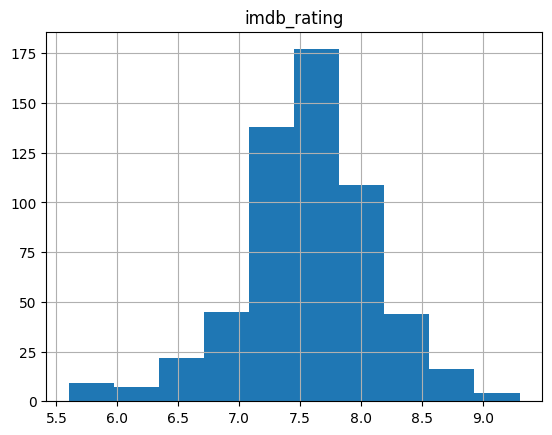

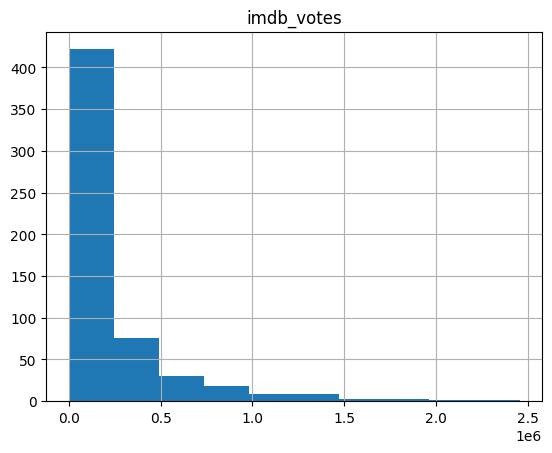

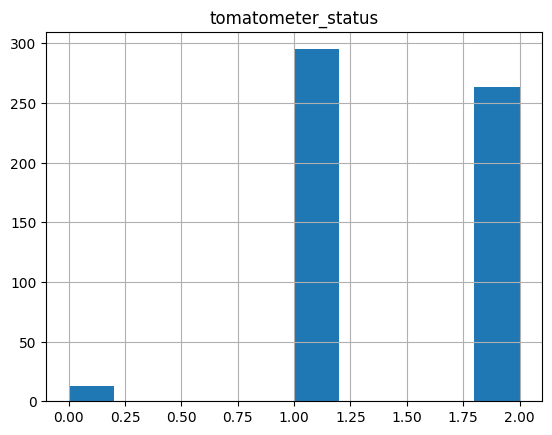

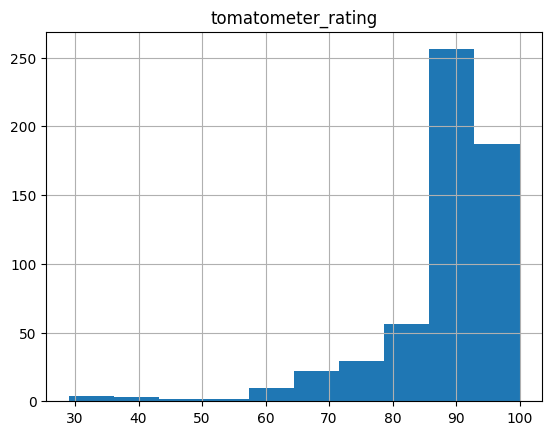

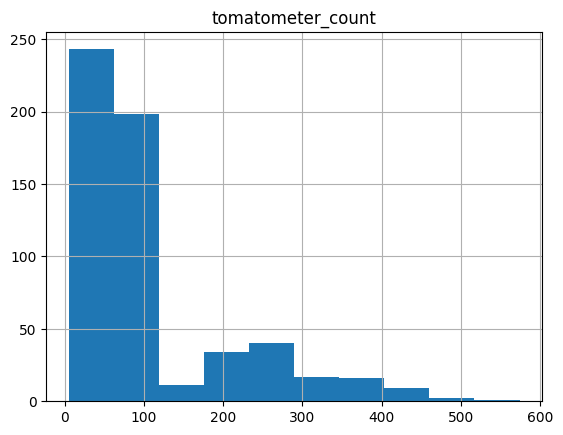

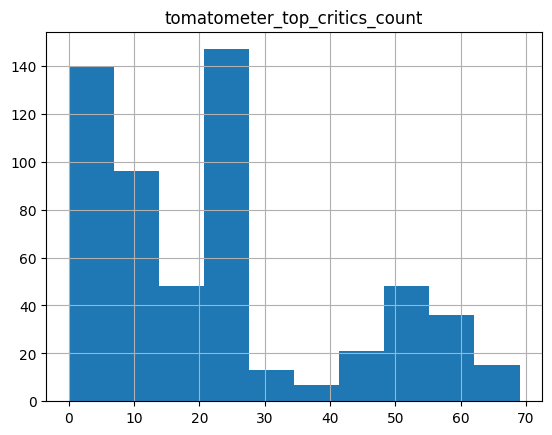

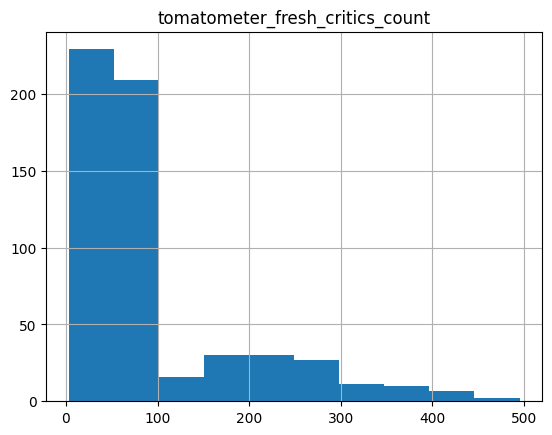

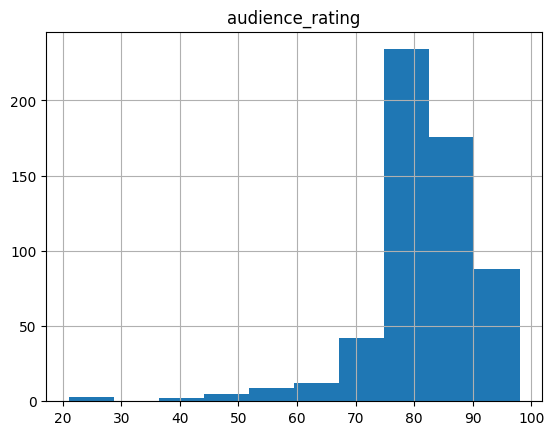

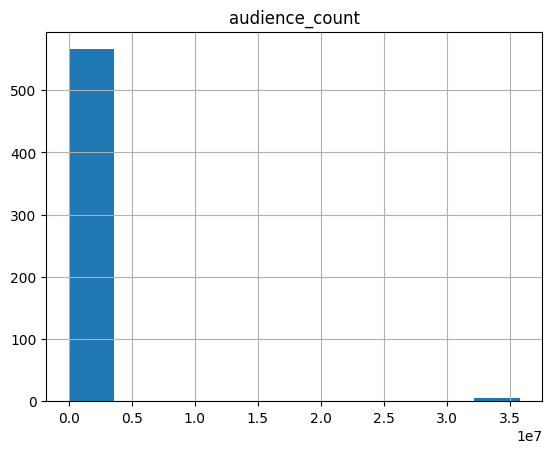

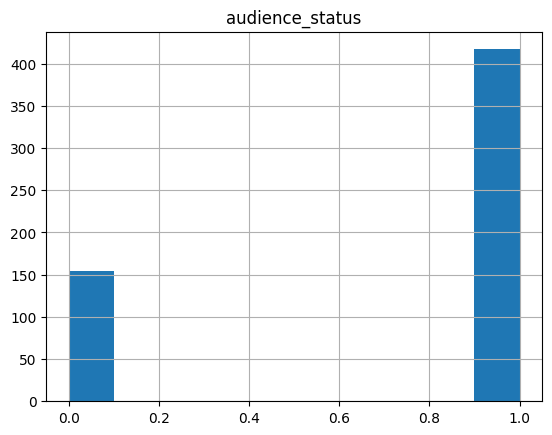

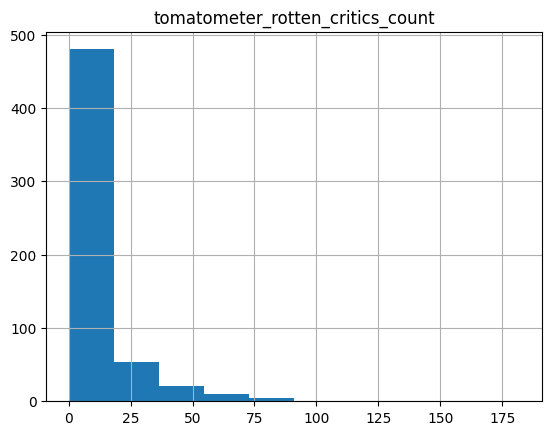

In [22]:
columns = ["imdb_rating", "imdb_votes", "tomatometer_status", "tomatometer_rating","tomatometer_count","tomatometer_top_critics_count",
                 "tomatometer_fresh_critics_count", "audience_rating", "audience_count", "audience_status", "tomatometer_rotten_critics_count"]

for column in columns:
    data.hist(column)

Выводы:
- tomatometer_rotten_critics_count (кол-во отзывов с оценкой испорченного томата), audience_count (кол-во пользователей, оставивших отзывы), imdb_votes (кол-во голосов на imdb), audience_rating (рейтинг аудитории), imdb_rating (рейтинг на imdb), tomatometer_rating (рейтинг на rottentomatoes), tomatometer_count (кол-во отзывов томатометра), tomatometer_fresh_critics_count (отзывы томатометра категории "fresh"), tomatometer_rotten_critics_count (отзывы томатометра категории "rotten") имеют аномальные значения
- tomatometer_status, audience_status не трогаем потому, что там небольшое число вариантов => никакие значения не закрывают другие. 

- imdb_rating и так имеет почти симметричный график (медиана почти равна среднему значению)

# Изучение и обработка выбросов

In [23]:
outliers = data[["imdb_votes", "tomatometer_rating","tomatometer_count",
                 "tomatometer_fresh_critics_count", "audience_rating", "audience_count", "tomatometer_rotten_critics_count"]]
outliers

,imdb_votes,tomatometer_rating,tomatometer_count,tomatometer_fresh_critics_count,audience_rating,audience_count,tomatometer_rotten_critics_count
0,12221,93.000000,46,43,78.000000,3530,3
1,3439,87.503417,110,98,82.428246,515414,12
2,1257,87.503417,110,98,82.428246,515414,12
3,6890,33.000000,24,8,21.000000,1813,16
4,765,87.503417,110,98,82.428246,515414,12
...,...,...,...,...,...,...,...
566,65380,87.503417,110,98,82.428246,515414,12
567,57976,87.503417,110,98,82.428246,515414,12
568,122269,87.503417,110,98,82.428246,515414,12
569,102807,87.503417,110,98,82.428246,515414,12


In [24]:
# Определить нижние пределы для выбросов
Q1 = outliers.quantile(0.25)
Q1

imdb_votes                          9660.5
tomatometer_rating                    86.0
tomatometer_count                     33.0
tomatometer_fresh_critics_count       28.0
audience_rating                       81.0
audience_count                      9243.5
tomatometer_rotten_critics_count       2.0
Name: 0.25, dtype: float64

In [25]:
# Определить верхние пределы выбросов
Q3 = outliers.quantile(0.75)
Q3

imdb_votes                          259429.0
tomatometer_rating                      94.0
tomatometer_count                      110.0
tomatometer_fresh_critics_count         98.0
audience_rating                         88.0
audience_count                      515414.0
tomatometer_rotten_critics_count        12.0
Name: 0.75, dtype: float64

In [26]:
# IQR-оценки
IQR = Q3-Q1
# Отфильтрованные данные, из которых удалены выбросы
data_filtered = outliers[~((outliers < (Q1 - 1.5 * IQR)) |(outliers > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,imdb_votes,tomatometer_rating,tomatometer_count,tomatometer_fresh_critics_count,audience_rating,audience_count,tomatometer_rotten_critics_count
0,12221,93.000000,46,43,78.000000,3530,3
1,3439,87.503417,110,98,82.428246,515414,12
2,1257,87.503417,110,98,82.428246,515414,12
4,765,87.503417,110,98,82.428246,515414,12
5,2004,87.503417,110,98,82.428246,515414,12
...,...,...,...,...,...,...,...
566,65380,87.503417,110,98,82.428246,515414,12
567,57976,87.503417,110,98,82.428246,515414,12
568,122269,87.503417,110,98,82.428246,515414,12
569,102807,87.503417,110,98,82.428246,515414,12


In [27]:
# Копирование индексов
index_list = list(data_filtered.index.values)


In [28]:
# Хранить данные без выбросов в отдельном DataFrame.
data_filtered = data[data.index.isin(index_list)]
data_filtered


,unnamed:_0,film,oscar_year,film_studio/producer(s),award,year_of_release,movie_time,movie_genre,imdb_rating,imdb_votes,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,film_id
0,0,Wings,1927/28,Famous Players-Lasky,True,1927,144,"Drama,Romance,War",7.5,12221,...,2,93.000000,46,1,78.000000,3530,9,43,3,2becf7d5-a3de-46ab-ae45-abdd6b588067
1,1,7th Heaven,1927/28,Fox,False,1927,110,"Drama,Romance",7.7,3439,...,1,87.503417,110,0,82.428246,515414,21,98,12,19ed3295-a878-4fd2-8e60-5cd7b5f93dad
2,2,The Racket,1927/28,The Caddo Company,False,1928,84,"Crime,Drama,Film-Noir",6.7,1257,...,1,87.503417,110,0,82.428246,515414,21,98,12,3111c2d8-0908-4093-8ff3-99c89f2f2f08
4,4,Alibi,1928/29,Feature Productions,False,1929,91,"Action,Crime,Romance",5.8,765,...,1,87.503417,110,0,82.428246,515414,21,98,12,609887c2-877c-43a4-b88c-e40e31096a98
5,5,Hollywood Revue,1928/29,Metro-Goldwyn-Mayer,False,1929,130,"Comedy,Music",5.7,2004,...,1,87.503417,110,0,82.428246,515414,21,98,12,689f22d5-a700-4ce1-b9be-65652f32c186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,Mank,2020,"Ceán Chaffin, Eric Roth, and Douglas Urbanski",False,2020,131,"Biography,Comedy,Drama",6.9,65380,...,1,87.503417,110,0,82.428246,515414,21,98,12,47d4ae4f-e782-4cd9-9508-4a07302b1c1a
567,567,Minari,2020,Christina Oh,False,2020,115,Drama,7.5,57976,...,1,87.503417,110,0,82.428246,515414,21,98,12,7262b3a8-214d-4205-985c-70e0860f3236
568,568,Promising Young Woman,2020,"Ben Browning, Ashley Fox, Emerald Fennell, and...",False,2020,113,"Crime,Drama,Thriller",7.5,122269,...,1,87.503417,110,0,82.428246,515414,21,98,12,d64c669b-7a73-496a-bddb-19cb09264371
569,569,Sound of Metal,2020,Bert Hamelinck and Sacha Ben Harroche,False,2019,120,"Drama,Music",7.8,102807,...,1,87.503417,110,0,82.428246,515414,21,98,12,647357e9-c067-46bd-aaeb-24d4344ec124


Новая переменная сохранила отфильтрованные данные без выбросов. Далее отфильтрованные данные будут использоваться для создания гистограммы.

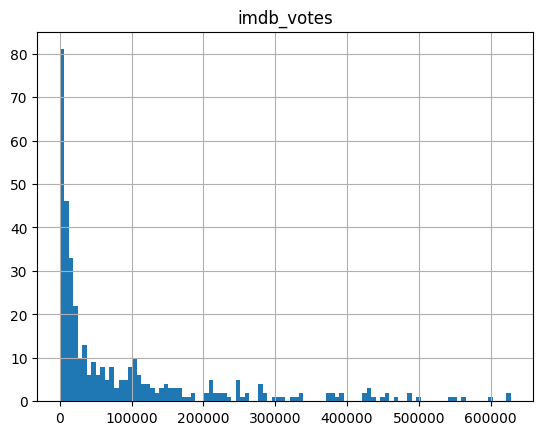

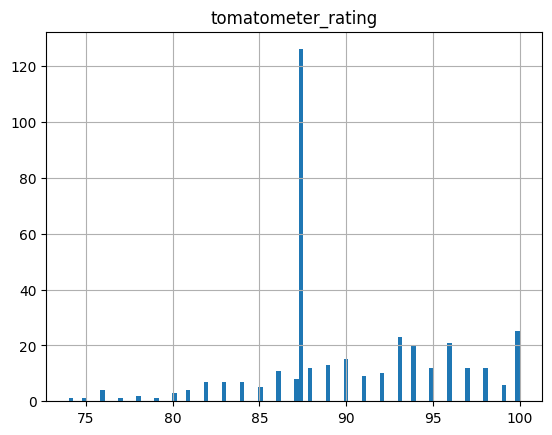

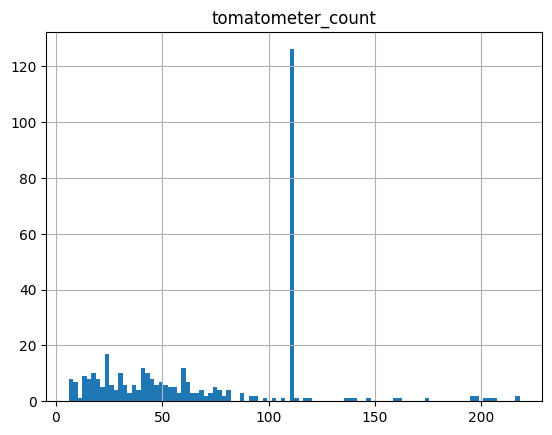

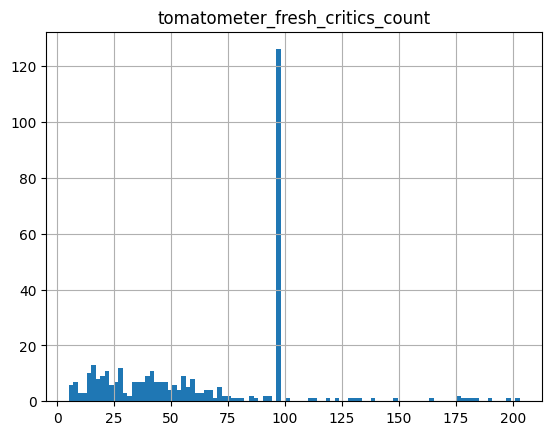

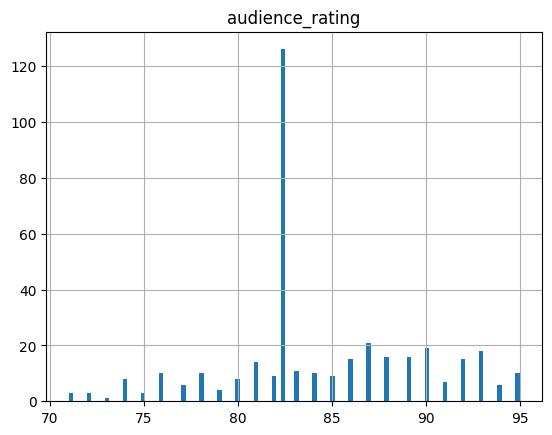

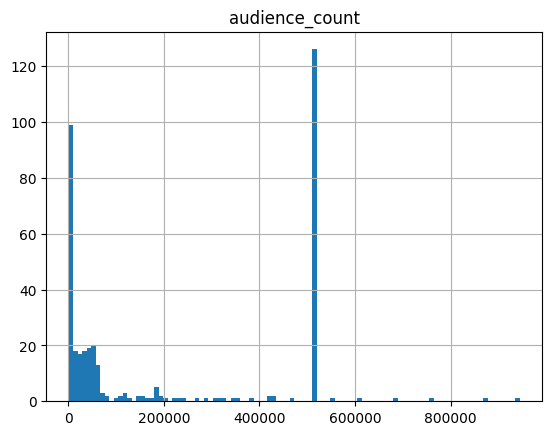

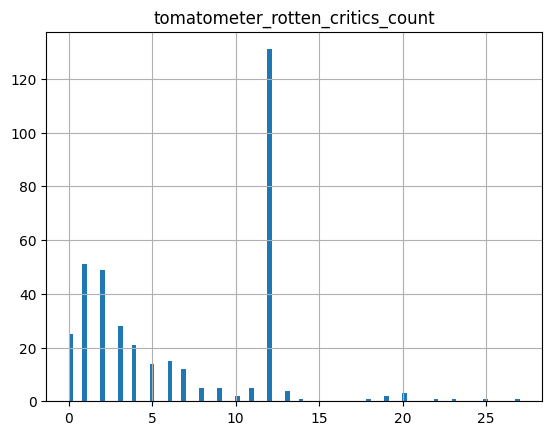

In [29]:
# создать гистограмму с отфильтрованным выбросом
filtered_outliers = data_filtered[["imdb_votes", "tomatometer_rating","tomatometer_count",
                 "tomatometer_fresh_critics_count", "audience_rating", "audience_count", "tomatometer_rotten_critics_count"]]

for col in filtered_outliers:
    data_filtered.hist(col, bins=100)

# Сравнение параметров с выбросами и без 

Сравнение голосов на сервисе imdb

[[<Axes: title={'center': 'imdb_votes'}>]]
[[<Axes: title={'center': 'imdb_votes'}>]]


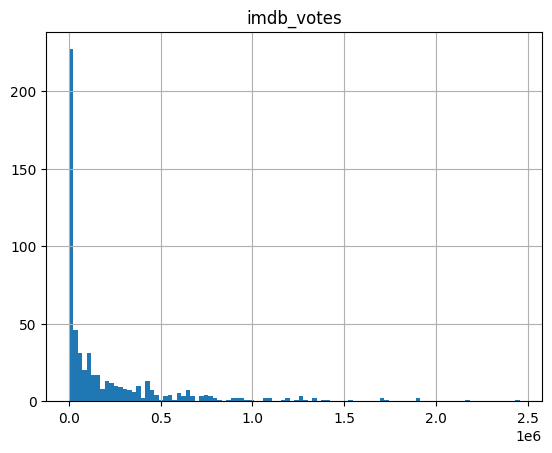

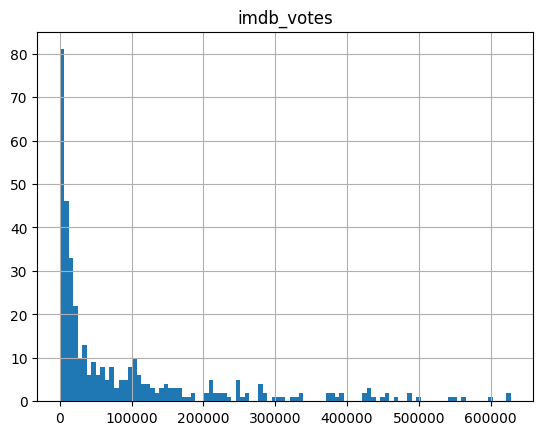

In [30]:
print (data.hist('imdb_votes', bins=100))
print (data_filtered.hist('imdb_votes', bins=100))

- с выбросаими значения были в диапозоне [0, 25 * 1е5], без выбросов стали [0, 6 * 1e5], т.е. деление сократилось на 25-6 = 9 ячеек

- отбросив аномально высокие кол-ва отзывов imdb график стал менее резким. С  меньшим деленим стало чётче видны значения большего кол-ва голосов на imdb у фильмов (грубо говоря, не сплошная "шпала", а постепенная лесенка). Стало подробнее видно на графике более популярное кол-во imdb отзывов фильмов, по нему можно сказать, что в среднем у фильма кол-во imdb отзывов находится между нулем и 1е5. 

In [31]:
data.describe()

,unnamed:_0,year_of_release,movie_time,imdb_rating,imdb_votes,original_release_date,streaming_release_date,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571,571,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,571.000000,571.000000
mean,285.000000,1973.357268,124.894921,7.570403,2.084804e+05,1976-07-17 07:22:49.476081984,2014-10-12 18:18:04.931506944,1.437828,87.503417,110.535902,0.730298,82.428246,5.154144e+05,21.661996,98.362522,12.211909
min,0.000000,1927.000000,66.000000,5.600000,1.800000e+01,1927-08-12 00:00:00,2007-12-31 00:00:00,0.000000,29.000000,5.000000,0.000000,21.000000,6.000000e+00,0.000000,3.000000,0.000000
25%,142.500000,1944.000000,107.000000,7.300000,9.660500e+03,1958-02-20 12:00:00,2014-01-31 12:00:00,1.000000,86.000000,33.000000,0.000000,81.000000,9.243500e+03,7.000000,28.000000,2.000000
50%,285.000000,1972.000000,121.000000,7.600000,5.899600e+04,1976-07-17 07:22:49.476082016,2014-10-12 18:18:04.931506944,1.000000,87.503417,82.000000,1.000000,82.428246,6.358800e+04,21.000000,75.000000,9.000000
75%,427.500000,2001.000000,136.500000,7.900000,2.594290e+05,1995-01-23 12:00:00,2016-04-19 00:00:00,2.000000,94.000000,110.000000,1.000000,88.000000,5.154140e+05,26.000000,98.000000,12.000000
max,570.000000,2021.000000,238.000000,9.300000,2.452594e+06,2019-11-06 00:00:00,2020-03-31 00:00:00,2.000000,100.000000,574.000000,1.000000,98.000000,3.579764e+07,69.000000,495.000000,182.000000
std,164.977776,29.315738,26.322817,0.559652,3.423499e+05,NaN,NaN,0.540537,10.247956,104.789965,0.444194,9.579354,3.176002e+06,18.951543,94.496022,16.927677


Теперь взглянем на томатометровый рейтинг фильма

[[<Axes: title={'center': 'tomatometer_rating'}>]]


[[<Axes: title={'center': 'tomatometer_rating'}>]]


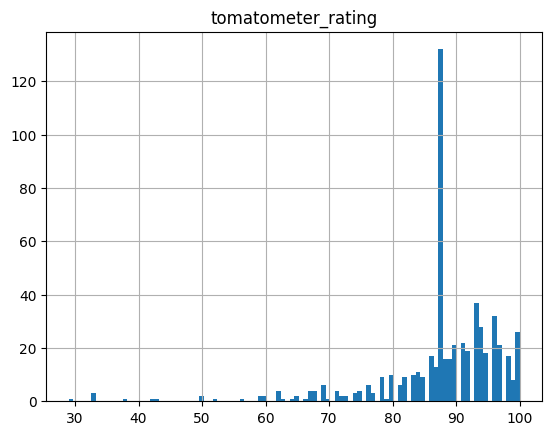

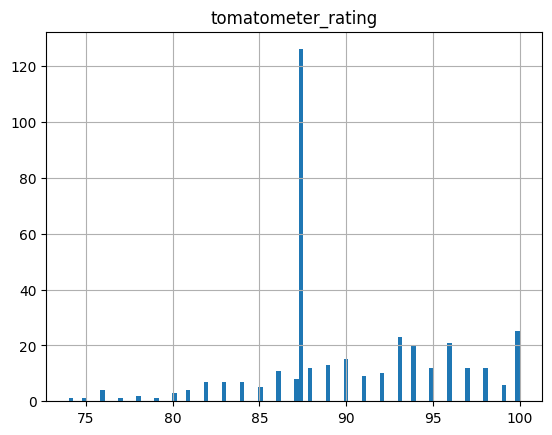

In [32]:
print (data.hist("tomatometer_rating", bins=100))
print (data_filtered.hist("tomatometer_rating", bins=100))

- аномальные значения ниже 70, мешавшие увидеть настоящие распределение, были отброшены

- график стал симметричным (каким и должен быть в начале, т.к. медиана = среднее значение - нормальное распределение)

- мы также видим, что второе, после среднего, по популярности значения находятся между 93 и 100, т.е. по подавляющем большинстве томатометровый рейтинг довольно высок - выше 85.

Количество отзывов томатометра с маркерами "Испорченный" и "Свежий":

[[<Axes: title={'center': 'tomatometer_count'}>]]
[[<Axes: title={'center': 'tomatometer_count'}>]]


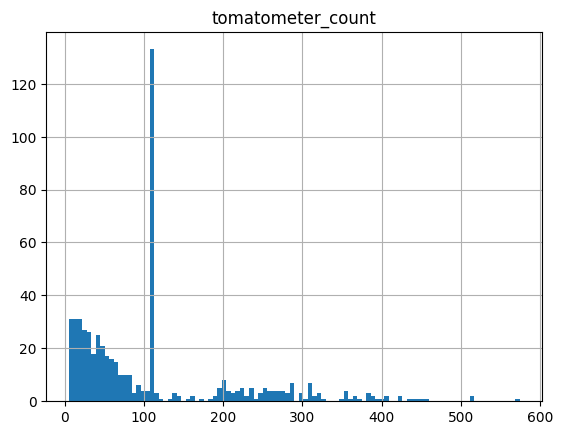

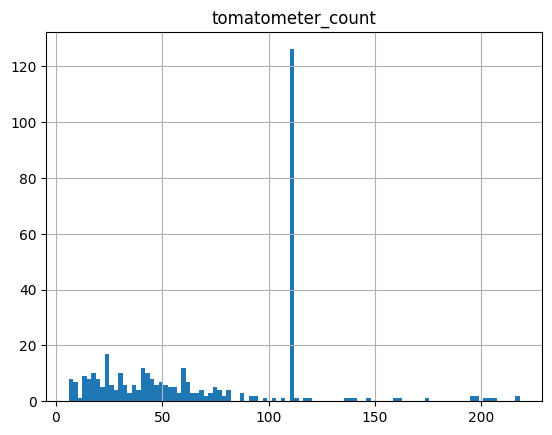

In [33]:
print (data.hist("tomatometer_count", bins=100))
print (data_filtered.hist("tomatometer_count", bins=100))

- деление уменьшилось с "до 600" до "до 250", отбросив значения, большие 250, которых меньшинство

- как по describe() мы знаем медианное значение меньше среднего (110.5), что выражено в смещении графика вправо.
- по графику видно, что в своём большинстве вторым по популярности, после среднего, кол-во "испорченных" и "свежих" голосов где-то от 11 до 55 штук.


Теперь разберем по частям параметр tomatometer_count (ведь, он - сумма двух параметров, которые будем изучать ниже)

 Количество отзывов по томатометру с маркером "Испорченный" 

[[<Axes: title={'center': 'tomatometer_rotten_critics_count'}>]]
[[<Axes: title={'center': 'tomatometer_rotten_critics_count'}>]]


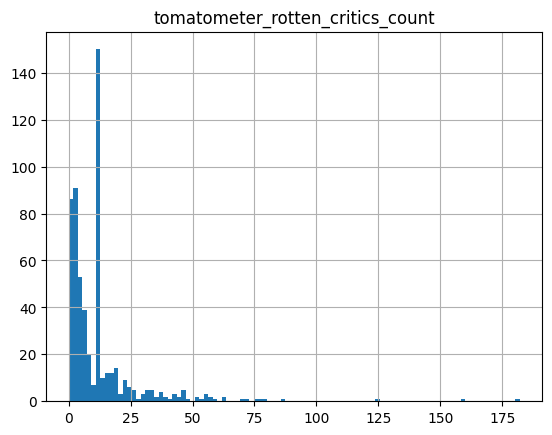

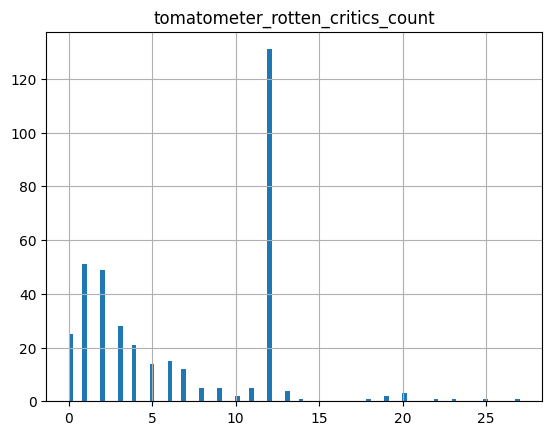

In [34]:
print (data.hist("tomatometer_rotten_critics_count", bins=100))
print (data_filtered.hist("tomatometer_rotten_critics_count", bins=100))

- деления сократились с "до 175" на "до 25", чётче стали видны среднее значение и медиана

- среднее значение равно 12 голосам, вторым значений по популярности будет 1 и третьим - 2 голосам.
- безвыбросный график в принципе очень схож с графиком суммы отзывов "свежего" и "испорченного"

 Количество отзывов по томатометру с маркером "Свежий" 

[[<Axes: title={'center': 'tomatometer_fresh_critics_count'}>]]
[[<Axes: title={'center': 'tomatometer_fresh_critics_count'}>]]


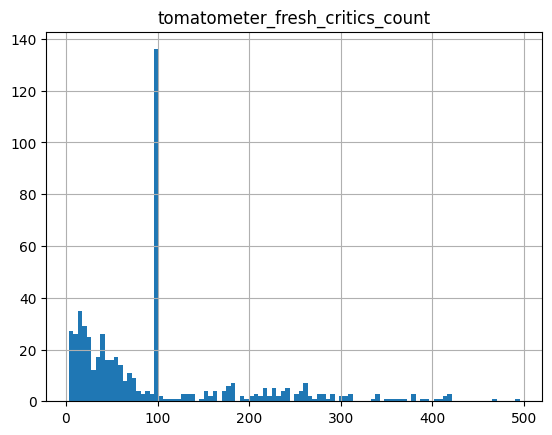

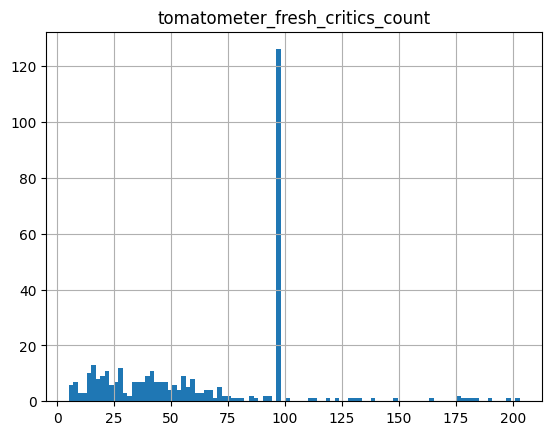

In [35]:
print (data.hist("tomatometer_fresh_critics_count", bins=100))
print (data_filtered.hist("tomatometer_fresh_critics_count", bins=100))

Кол-во отзыв в разделе "аудитории"

[[<Axes: title={'center': 'audience_count'}>]]
[[<Axes: title={'center': 'audience_count'}>]]


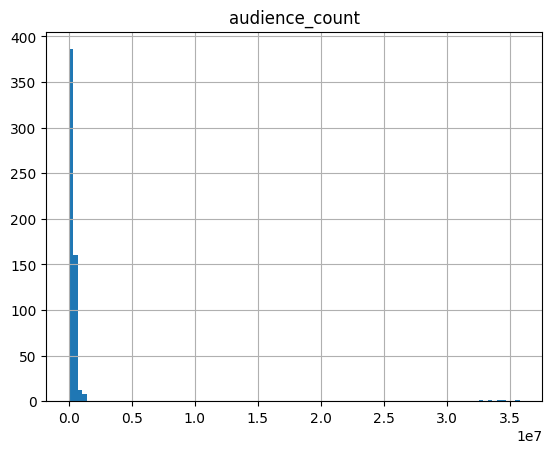

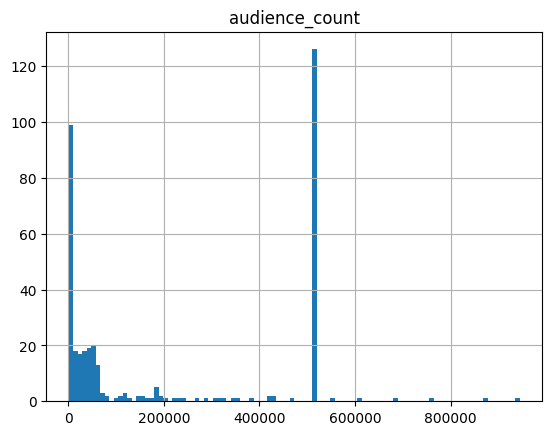

In [36]:
print (data.hist("audience_count", bins=100))
print (data_filtered.hist("audience_count", bins=100))


- диапазон сократился с [0, 350 * 1e5] до [0, 10 * 1e5] 

- график немного выравнился по сравнению с с одной "палкой" предыдущего графика, что соответствует реальным данным поля audience_count (мы это знаем из describe())

- более подробный график позволяет более тщательно рассмотреть наиболее популярные кол-ва голосов

- наиболее популярное - среднее значение - составляет ~5.1e+05 (примерно 5 100 000), второе по популярности значение близко с нулём - очень маленькое, 3-е место может полноправно занять диапазон ~(0, 50000] 

## Анализ через диаграммы

In [37]:

avg_tomatrating_genre = data_filtered.pivot_table(index='movie_genre', values='tomatometer_rating', aggfunc='mean')
avg_tomatrating_genre =  avg_tomatrating_genre.sort_values(ascending=False ,by='tomatometer_rating')

avg_tomatrating_genre = avg_tomatrating_genre.reset_index()
avg_tomatrating_genre.head(10)

,movie_genre,tomatometer_rating
0,"Comedy,Fantasy,Romance",100.0
1,"Action,Adventure,History",100.0
2,"Action,Adventure,Romance",100.0
3,"Crime,Film-Noir,Mystery",100.0
4,"Drama,Family,Western",100.0
5,"Comedy,Family,Fantasy",100.0
6,"Drama,Mystery,War",98.0
7,"Adventure,Family,Fantasy",98.0
8,"Drama,Mystery",98.0
9,"Adventure,Thriller",98.0


<Axes: xlabel='movie_genre'>

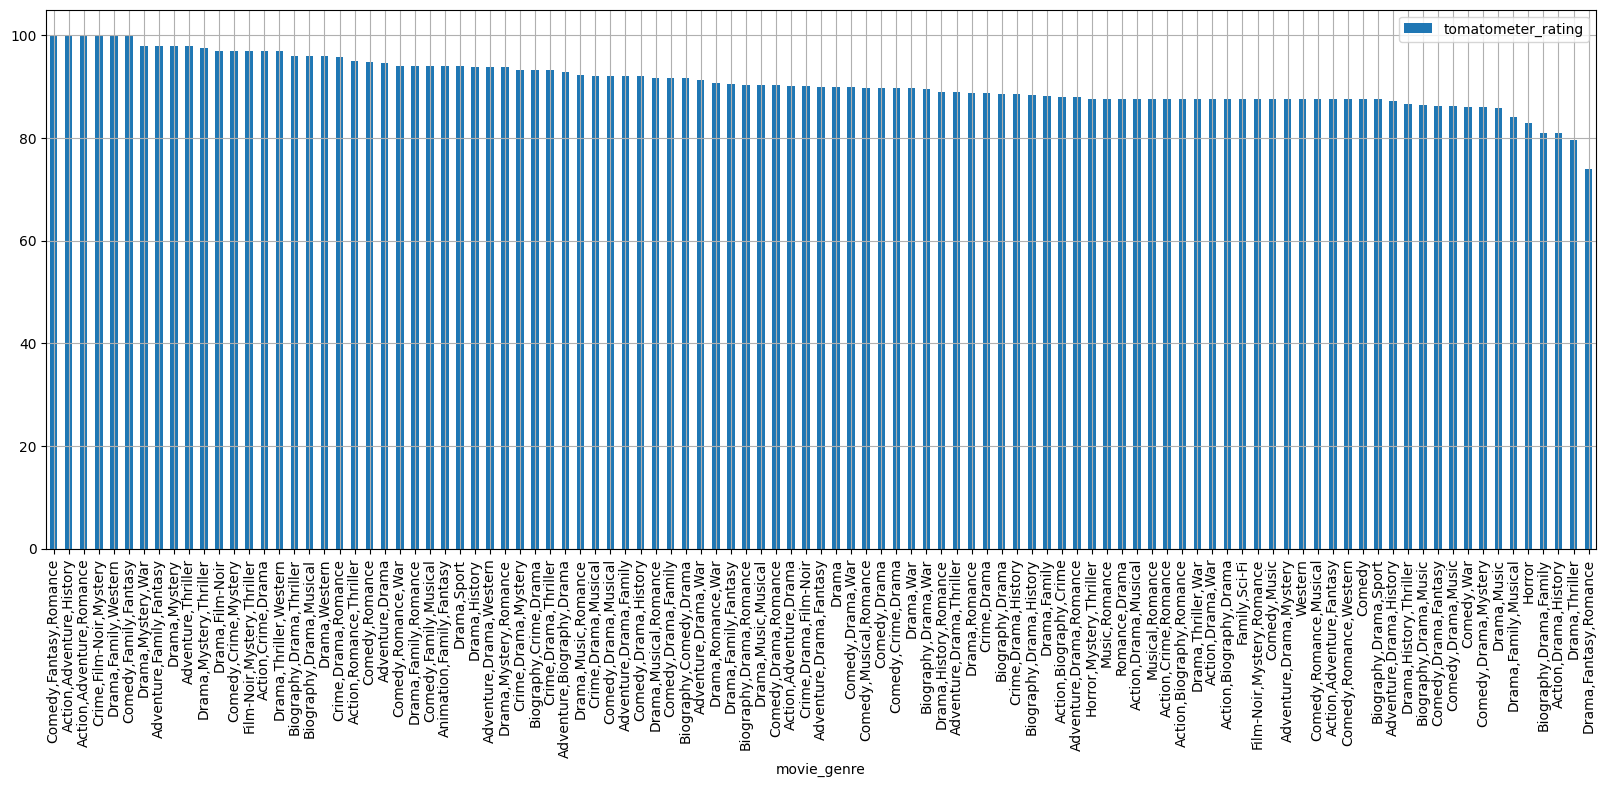

In [38]:
avg_tomatrating_genre.plot(grid=True, figsize=(20, 7), kind = 'bar', x='movie_genre',y='tomatometer_rating')

(c тем, как я удалил выбросы, у меня разность максимального и минимальный рейтинг уменьшилась)

Мы видим, что максимальный томатометровый рейтинг у фильмов с жанрами "Комедия. Роман. Фэнтези", а самый низкий - у "Драма. Фэнтези. Роман". Значит, в среднем пользователям сервиса rottentomatoes больше заходят романтичные комедии с элементами фэнтези, а меньше всего - романтичные драмы с элементами фэнтези.

In [39]:

avg_tomatrating_produccompanies = data_filtered.pivot_table(index='production_company', values='tomatometer_rating', aggfunc='mean')
avg_tomatrating_produccompanies =  avg_tomatrating_produccompanies.sort_values(ascending=False ,by='tomatometer_rating')

avg_tomatrating_produccompanies = avg_tomatrating_produccompanies.reset_index()
avg_tomatrating_produccompanies

,production_company,tomatometer_rating
0,RKO,100.000000
1,Walt Disney Productions,100.000000
2,Image Entertainment Inc.,100.000000
3,Sony Pictures,99.000000
4,Paramount Home Video,97.333333
...,...,...
62,Orion Pictures Corporation,84.000000
63,HBO Video,84.000000
64,20th Century-Fox,83.000000
65,Gramercy,82.000000


<Axes: xlabel='production_company'>

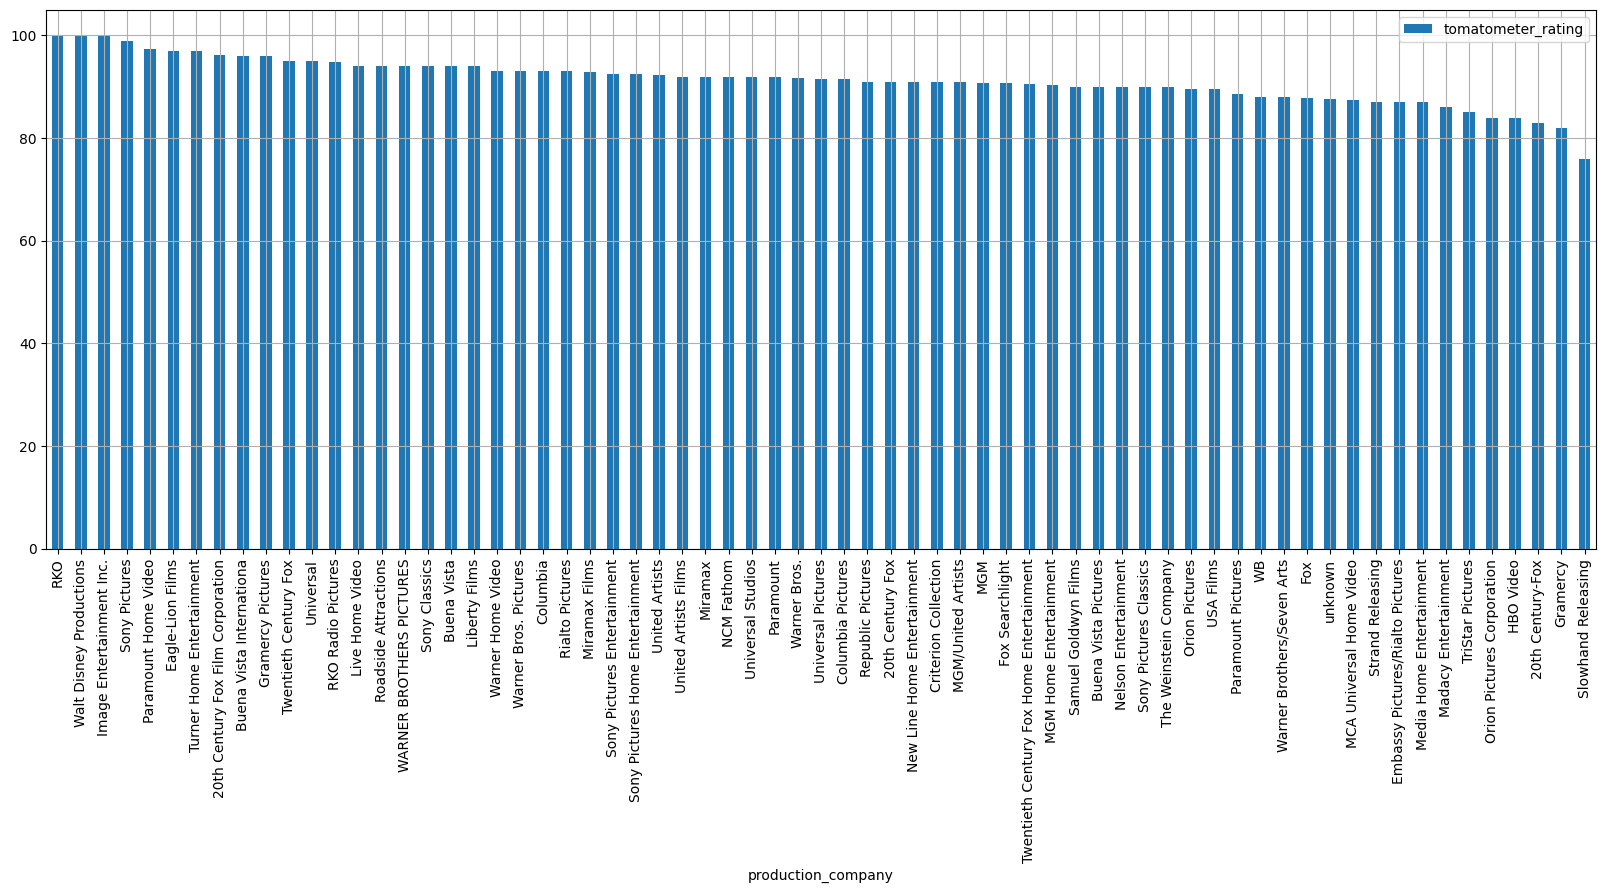

In [40]:
avg_tomatrating_produccompanies.plot(grid=True, figsize=(20, 7), kind = 'bar', x='production_company',y='tomatometer_rating')

Из представленной высшей статистики видно, что максимальным рейтинг имеют фильмы со следующими произведственными компаниями: Walt Disney Productions, RKO, Image Entertainment Inc.; а минимальный - Slowhand Releasing. 

То есть, в среднем среднестатистический фильм первой группы имеет максимальный (100) рейтинг, а второй группы - минимальный (52). 

In [41]:

avg_tomatrating_content = data_filtered.pivot_table(index='content_rating', values='tomatometer_rating', aggfunc='mean')
avg_tomatrating_content =  avg_tomatrating_content.sort_values(ascending=False ,by='tomatometer_rating')

avg_tomatrating_content = avg_tomatrating_content.reset_index()
avg_tomatrating_content

,content_rating,tomatometer_rating
0,NR,92.581081
1,PG,91.677419
2,G,90.944444
3,R,90.934426
4,PG-13,89.157895
5,unknown,87.503417


Больше всего рейтинг имеет NR и PG, их дальше и будем использовать

In [70]:

avg_tomatrating_award = data_filtered.pivot_table(index='award', values='tomatometer_rating', aggfunc='mean')
avg_tomatrating_award =  avg_tomatrating_content.sort_values(ascending=False ,by='tomatometer_rating')

avg_tomatrating_award = avg_tomatrating_award.reset_index()
avg_tomatrating_award

,index,content_rating,tomatometer_rating
0,0,NR,92.581081
1,1,PG,91.677419
2,2,G,90.944444
3,3,R,90.934426
4,4,PG-13,89.157895
5,5,unknown,87.503417


## Факторы, влияющие на томатовый рейтинг

Основные влияющие на рейтинг характеристики:
- жанр
- производственная компания
- кол-во оставленных отзывов с одной из статусов помидора
- режиссёр
- кол-во оставленных отзывов Топ критиками
- ограничение по возрасту

In [43]:
winners = data_filtered.query('award == True')
candidates = data_filtered.query('award == False')


Text(0.5, 1.0, 'Candidates')

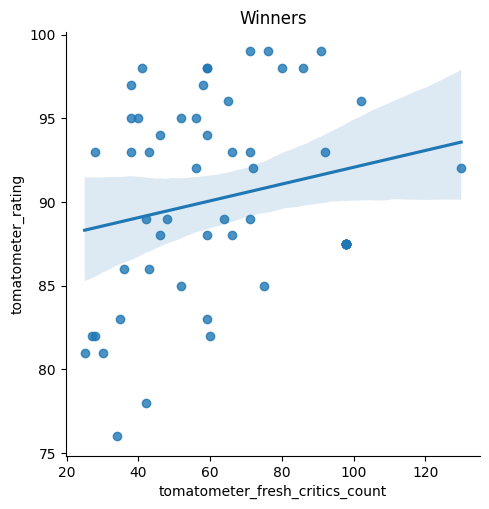

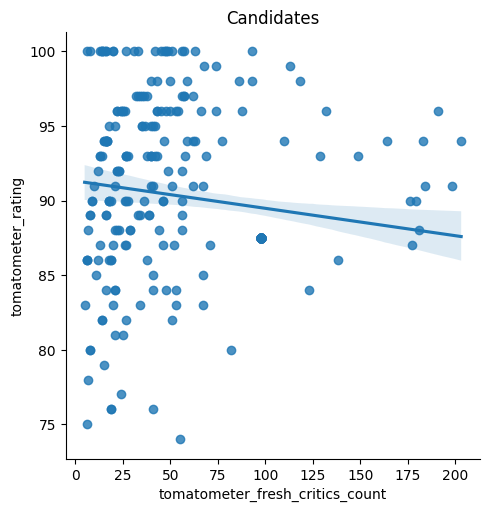

In [44]:
sns.lmplot(x="tomatometer_fresh_critics_count", y="tomatometer_rating", data=winners)
plt.title('Winners')
sns.lmplot(x="tomatometer_fresh_critics_count", y="tomatometer_rating", data=candidates)
plt.title('Candidates')

In [45]:
# вычисление корелляции
tomatstat_winners = winners[['tomatometer_fresh_critics_count','tomatometer_rating']]
corr_winners = tomatstat_winners.corr()
tomatstat_candidates = candidates[['tomatometer_fresh_critics_count','tomatometer_rating']]
corr_candidates = tomatstat_candidates.corr()

In [46]:
round(corr_winners,3)

,tomatometer_fresh_critics_count,tomatometer_rating
tomatometer_fresh_critics_count,1.000,0.215
tomatometer_rating,0.215,1.000


In [47]:
round(corr_candidates,3)

,tomatometer_fresh_critics_count,tomatometer_rating
tomatometer_fresh_critics_count,1.000,-0.145
tomatometer_rating,-0.145,1.000


In [48]:
# вычисление корелляции
tomatstat_winners = winners[['imdb_rating','tomatometer_rating']]
corr_winners = tomatstat_winners.corr()
tomatstat_candidates = candidates[['imdb_rating','tomatometer_rating']]
corr_candidates = tomatstat_candidates.corr()

In [49]:
round(corr_winners,3)

,imdb_rating,tomatometer_rating
imdb_rating,1.000,0.526
tomatometer_rating,0.526,1.000


In [50]:
round(corr_candidates,3)

,imdb_rating,tomatometer_rating
imdb_rating,1.000,0.296
tomatometer_rating,0.296,1.000


Очень неплохие показатели корреляции - чуть больше 0.5 - у выигрывших Оскар и практически в два раза меньшие у кандидатов. То есть у фильмов, получивших Оскар, показатель imdb рейтинга влиял больше, чем у кандидатов. То есть с увеличением imdb рейтинга увеличивается томатовый рейтинг и наоборот. 

#### Теперь пройдёмся по тому же процессу, но уже с датасетами, разграниченным по возрастным ограничениям

In [51]:
# Отфильтровано 3 максимальных по рейтингу компаний фильмов
NR = data_filtered.query('content_rating == "NR"')
PG = data_filtered.query('content_rating == "PG"')

Text(0.5, 1.0, 'PG')

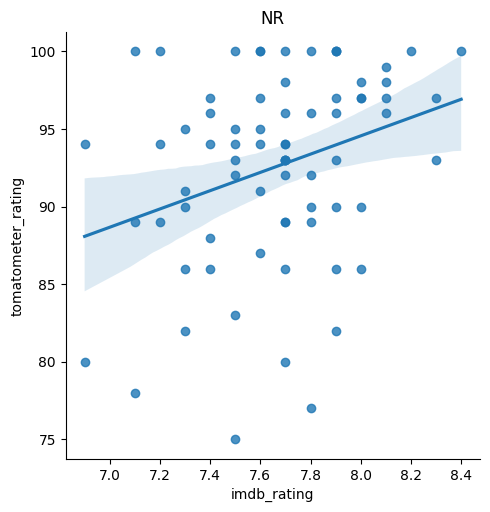

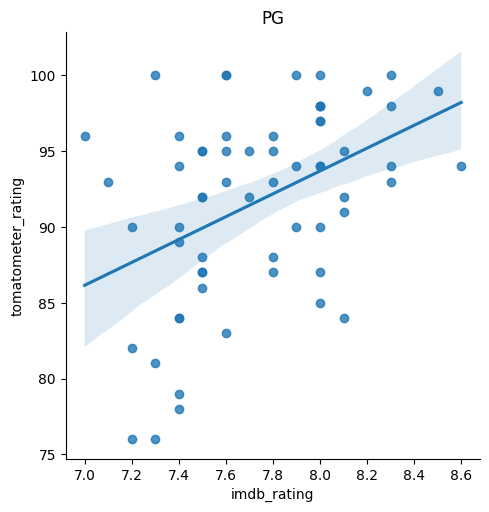

In [52]:
sns.lmplot(x="imdb_rating", y="tomatometer_rating", data=NR)
plt.title('NR')
sns.lmplot(x="imdb_rating", y="tomatometer_rating", data=PG)
plt.title('PG')

In [53]:
# вычисление корелляции
top_critics_nr = NR[['imdb_rating','tomatometer_rating']]
corr_nr = top_critics_nr.corr()
top_critics_pg = PG[['imdb_rating','tomatometer_rating']]
corr_pg = top_critics_pg.corr()

In [54]:
round(corr_nr,3)

,imdb_rating,tomatometer_rating
imdb_rating,1.000,0.308
tomatometer_rating,0.308,1.000


In [55]:
round(corr_pg,3)

,imdb_rating,tomatometer_rating
imdb_rating,1.000,0.434
tomatometer_rating,0.434,1.000


**Заключение**:
<br>
Кол-во отзывов топовых критиков для двух возрастных ограничений повлиял на томатовый рейтинг фильма. Увеличение кол-ва отзывов 
топовых критиков приведет к увеличению томатового рейтинга. Коэффициент корреляции положительный означает, что томатовый рейтинг  увеличивается с ростом кол-ва отзывов топовых критиков. Модуль корреляции меньше 0.5, то есть кол-во отзывов топ критиков не столь сильно влияет на томатовый рейтинг в целом.


Text(0.5, 1.0, 'PG')

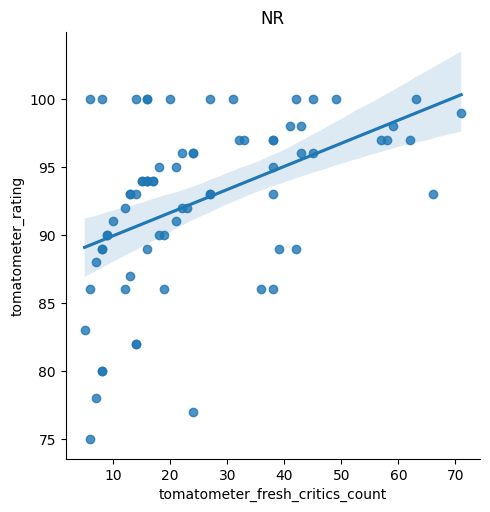

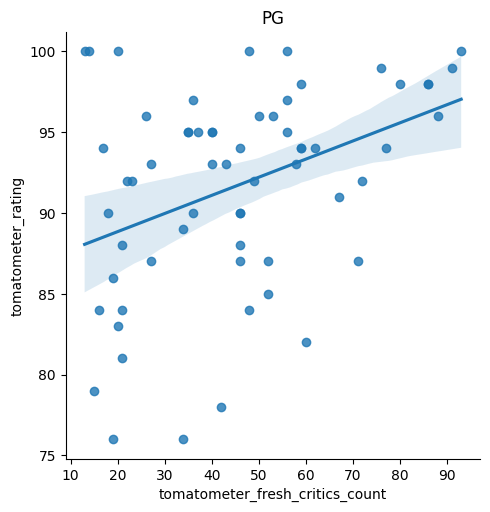

In [56]:
sns.lmplot(x="tomatometer_fresh_critics_count", y="tomatometer_rating", data=NR)
plt.title('NR')
sns.lmplot(x="tomatometer_fresh_critics_count", y="tomatometer_rating", data=PG)
plt.title('PG')

In [57]:
# вычисление корелляции
fresh_critics_nr = NR[['tomatometer_fresh_critics_count','tomatometer_rating']]
fresh_corr_nr = fresh_critics_nr.corr()
fresh_critics_pg = PG[['tomatometer_fresh_critics_count','tomatometer_rating']]
fresh_corr_pg = fresh_critics_pg.corr()

In [58]:
round(fresh_corr_nr,3)

,tomatometer_fresh_critics_count,tomatometer_rating
tomatometer_fresh_critics_count,1.000,0.463
tomatometer_rating,0.463,1.000


In [59]:
round(fresh_corr_pg,3)

,tomatometer_fresh_critics_count,tomatometer_rating
tomatometer_fresh_critics_count,1.000,0.387
tomatometer_rating,0.387,1.000


**Заключение**:
<br>
Кол-во отзывов c оценкой "fresh" для двух возрастных ограничений повлиял на томатовый рейтинг фильма. Увеличение кол-Кол-во отзывов c оценкой "fresh" приведет к увеличению томатового рейтинга. Коэффициент корреляции положительный означает, что томатовый рейтинг  увеличивается с ростом кол-ва отзывов c оценкой "fresh". Модуль корреляции меньше 0.5, но больше чем с кол-вом отзывов топ критиков, поэтому он сильнее положительно влияет на томатовый рейтинг, чем топовые критики.


## Исследование через ящик с усами

Поскольку, как мы выяснили ранее, корреляция рейтингов больше именно у двух датасетов победителей и кандидатов и у них число фильмов в сумме больше, то будем дальше работать именно с этими двумя winners и candidates  

In [60]:
# Отфильтровать категорию в условии с менее чем 50 экземплярами
winners.tomatometer_status.value_counts()

tomatometer_status
2    41
1    15
Name: count, dtype: int64

In [61]:
# Отфильтровать категорию в условии с менее чем 50 экземплярами
candidates.tomatometer_status.value_counts()

tomatometer_status
1    223
2     99
Name: count, dtype: int64

Как видим в отфильтрованных данных совсем исчезла категория 0 - Rotten - Испорченный. 

В датасете победителей у нас оба значения статуса меньше 50, потому их отбросим, с кандидатами же наоборот всё хорошо.

Text(0.5, 1.0, 'Candidates')

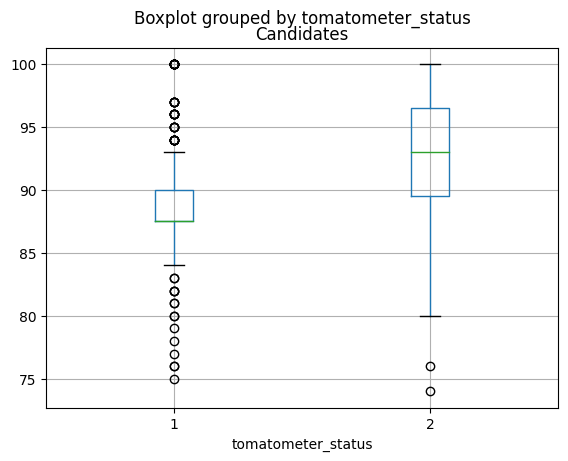

In [62]:
filter_status_award = data_filtered.query('tomatometer_status == [1,2] and award == False')
filter_status_award.boxplot(by ='tomatometer_status', column ='tomatometer_rating', grid = True)
plt.title('Candidates')

In [63]:
data_filtered.query('tomatometer_status == 1 and award == False')["tomatometer_rating"].describe()

count    223.000000
mean      89.057847
std        4.671799
min       75.000000
25%       87.503417
50%       87.503417
75%       90.000000
max      100.000000
Name: tomatometer_rating, dtype: float64

In [64]:
data_filtered.query('tomatometer_status == 2 and award == False')["tomatometer_rating"].describe()

count     99.000000
mean      92.555556
std        5.657255
min       74.000000
25%       89.500000
50%       93.000000
75%       96.500000
max      100.000000
Name: tomatometer_rating, dtype: float64

Фильмы с томатовым статусом 1 - Fresh, как хорошо видно по ящику с усами, имеют макс. значением 100 рейтинг, мин. - 75 рейтинг, 25-ый пернц-ль - 89 рейтинг, медиана - 93 рейтинг, 75-ым перц-лем - 96. 

То есть все фильмы со статусом Fresh-Свежий имеют довольно высокий рейтинг - от 75 до 100, причем 25% от всех данных имеют меньше либо равный 89 рейтинг - это довольно высоко. Минимальное значение показывает, что 0% данных меньше, чем 75 рейтинга, то есть все больше.

#### Всё-таки одним глазком взглянём на фильмы, разделённые по возрастным ограничениям PG и NR

In [65]:
# Отфильтровать категорию в условии с менее чем 50 экземплярами
NR.award.value_counts()

award
False    64
True     10
Name: count, dtype: int64

In [66]:
PG.award.value_counts()

award
False    48
True     14
Name: count, dtype: int64

Поскольку датасет с рейтинговыми ограничениями NR, PG очень малочисленный, то строк очень мало для исследования и к исследованию через ящик с усами подлежит лишь фильмы, непобедители Оскара  и с возрастным ограничением NR.

Text(0.5, 1.0, 'NR')

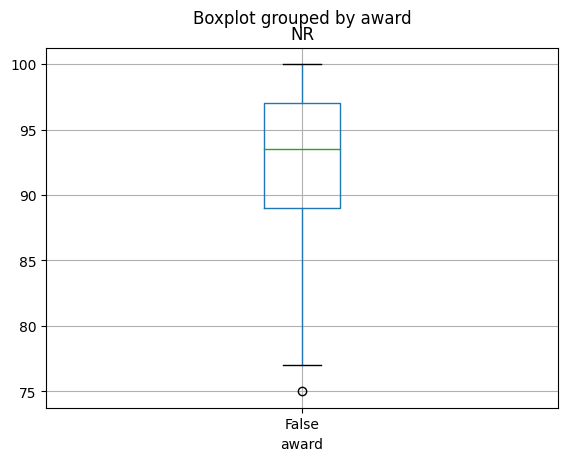

In [67]:
filter_award_NR = data_filtered.query('award == False and content_rating == "NR"')
filter_award_NR.boxplot(by ='award', column ='tomatometer_rating', grid = True)
plt.title('NR')

Итак по ящику можем увидеть следующие характиристики фильмов, не выигравших Оскар и с возрастным ограничением NR: макс. значение рейтинга - 100, мин. - 75, 25 перц-ль - 89, 50 перцентель - 93.5, 75 перцентель - 97. 

Опять же, минимальное значение показывает, что 0% фильмов, не выигравших Оскар и с возрастным ограничением NR, меньше 75 рейтинга на томатометре. А медиана - половина данных меньше или равна ей - тоже прилично большая, что скорее всего стало следствием избавления от выбросов.

In [68]:
filter_award_NR['tomatometer_rating'].describe()

count     64.00000
mean      92.28125
std        6.39064
min       75.00000
25%       89.00000
50%       93.50000
75%       97.00000
max      100.00000
Name: tomatometer_rating, dtype: float64

**Вывод:**

Итак, что мы сделали:
<br>
Исправили вид столбцов: 
- вместо пробела "_"
- заглавные буквы на строчные

Исправили тип данных полей:
- дату исправили на datetime
- поля, подразумевающие целочисленные значения, с float на int 
- для удобства последующего заполнения данных заменили Rotten-0, Fresh-1, Certified-Fresh-2 и Upright - 1, Spilled - 0.
- значение Candidate-False и значение Winner-True поля award 

Заполнили пропущенные значения:
- все поля, оканчивающиеся на "_count", время и рейтинг, и все числовые данные и статусы заполнили средним значением.
- текст-содержащие поля заполнили маркером "unknown", поскольку не получилось связать с другими полями, чтобы узнать доп. информацию

Проверили на дубликаты:
- дупликатов не было  обнаружено
- неявный дубликат был удалён (Uknown, unknown)

Определение основных числовых параметров и удаление выбросов из них:
- imdb не трогаем, ибо уже присутствует нормальное распределение и поля, оканчивающиеся на _status, также не трогаем, ибо там кол-во значений поля ограничено 
- все остальные провели через процесс обработки выбросов

Сравнение и анализ по диаграммам полей до выбросов и после.

Анализ через plot диаграммы.

Анализ и выводы через ящик с усами.





